In [2]:
#importing libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import random
import time

In [3]:
# generating data
X,_ = make_blobs(n_samples = 1000, centers = 3, cluster_std = 1, random_state = 42)
X

array([[-6.59633932, -7.13901457],
       [-6.13753182, -6.58081701],
       [ 5.19820575,  2.04917508],
       ...,
       [ 3.69047995,  4.60555175],
       [ 4.03036663,  1.78619838],
       [-7.44179522, -7.08933147]])

In [4]:
#converting data to list of lists
data = [list(point) for point in X]
data

[[np.float64(-6.596339319605128), np.float64(-7.139014566980024)],
 [np.float64(-6.137531819141963), np.float64(-6.5808170128694545)],
 [np.float64(5.198205748749824), np.float64(2.0491750753531437)],
 [np.float64(-2.9685585225929945), np.float64(8.16444175873353)],
 [np.float64(-2.768788974416355), np.float64(7.511143175080216)],
 [np.float64(-6.822614066254186), np.float64(-6.61151731441269)],
 [np.float64(5.020076687234065), np.float64(2.583755429224555)],
 [np.float64(5.556206510930583), np.float64(2.319658159838725)],
 [np.float64(4.863792970292763), np.float64(3.337310113914576)],
 [np.float64(5.846387802736459), np.float64(1.156234012953496)],
 [np.float64(-2.171594960977548), np.float64(8.602409162075855)],
 [np.float64(-4.978436505398262), np.float64(-6.940770407090567)],
 [np.float64(-2.31013792747928), np.float64(8.414069251039527)],
 [np.float64(5.5581954422304145), np.float64(0.402669080317555)],
 [np.float64(5.252652741290671), np.float64(0.9197541207670759)],
 [np.float6

In [5]:
#function to compute euclidean distance
def euclidean_distance(point1, point2):
    return sum((p1-p2)**2 for p1, p2 in zip(point1, point2))**0.5

In [6]:
#function to initialize K random centroids
def initialize_centroids(data, k):
    return random.sample(data, k)

In [8]:
#function to assign points to closest centroid
def assign_clusters(data, centroids):
    clusters = {i:[] for i in range(len(centroids))}
    for point in data:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        closest_cluster = distances.index(min(distances))
        clusters[closest_cluster].append(point)
    return clusters

In [9]:
#function to compute new centroids
def compute_new_centroids(clusters):
    new_centroids = []
    for points in clusters.values():
        if points:
            new_centroid = [sum(dim) / len(points) for dim in zip(*points)]
        else:
            new_centroid = random.choice(points)
        new_centroids.append(new_centroid)
    return new_centroids

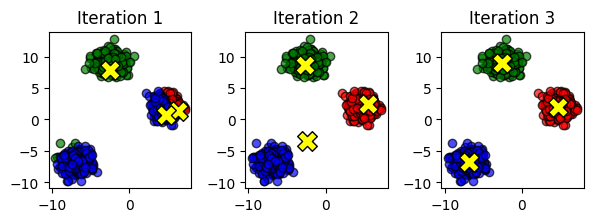

In [10]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import random
import time

# Function to compute Euclidean distance
def euclidean_distance(point1, point2):
    return sum((p1 - p2) ** 2 for p1, p2 in zip(point1, point2)) ** 0.5

# Function to initialize K random centroids
def initialize_centroids(data, k):
    return random.sample(data, k)

# Function to assign points to closest centroid
def assign_clusters(data, centroids):
    clusters = {i: [] for i in range(len(centroids))}
    for point in data:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        closest_cluster = distances.index(min(distances))
        clusters[closest_cluster].append(point)
    return clusters

# Function to compute new centroids
def compute_new_centroids(clusters):
    new_centroids = []
    for points in clusters.values():
        if points:
            new_centroid = [sum(dim) / len(points) for dim in zip(*points)]
        else:
            new_centroid = random.choice(points)
        new_centroids.append(new_centroid)
    return new_centroids

# K-Means Algorithm with Visualization
def k_means_visualized(data, k, max_iters=10):
    centroids = initialize_centroids(data, k)

    plt.figure(figsize=(8, 6))

    for iteration in range(max_iters):
        clusters = assign_clusters(data, centroids)

        # Visualization for each step
        plt.subplot(3, 4, iteration + 1)  # Arrange plots
        colors = ['r', 'g', 'b']
        for cluster_id, points in clusters.items():
            if points:
                plt.scatter(*zip(*points), color=colors[cluster_id], alpha=0.7, edgecolors='k', label=f'Cluster {cluster_id}')
        plt.scatter(*zip(*centroids), color='yellow', marker='X', s=200, edgecolors='black', label='Centroids')
        plt.title(f"Iteration {iteration+1}")

        new_centroids = compute_new_centroids(clusters)

        # Check for convergence
        if all(euclidean_distance(c, nc) < 1e-4 for c, nc in zip(centroids, new_centroids)):
            break

        centroids = new_centroids  # Update centroids

    plt.tight_layout()
    plt.show()


# Run K-Means with Visualization
k_means_visualized(data, k=3)


In [14]:
data = [[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]]
centroids = initialize_centroids(data, 2)
centroids

[[7, 8], [3, 4]]

In [17]:
clusters = assign_clusters(data, centroids)
clusters

{0: [[5, 6], [7, 8], [9, 10]], 1: [[1, 2], [3, 4]]}

In [18]:
compute_new_centroids(clusters)

[[7.0, 8.0], [2.0, 3.0]]